### Evghenii Gaisinschii 336551072
### Eugene Golovanov 323554121

In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import nltk
from nltk.corpus import stopwords
import time
from datetime import datetime 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

first_time = datetime.now() 

### Theory

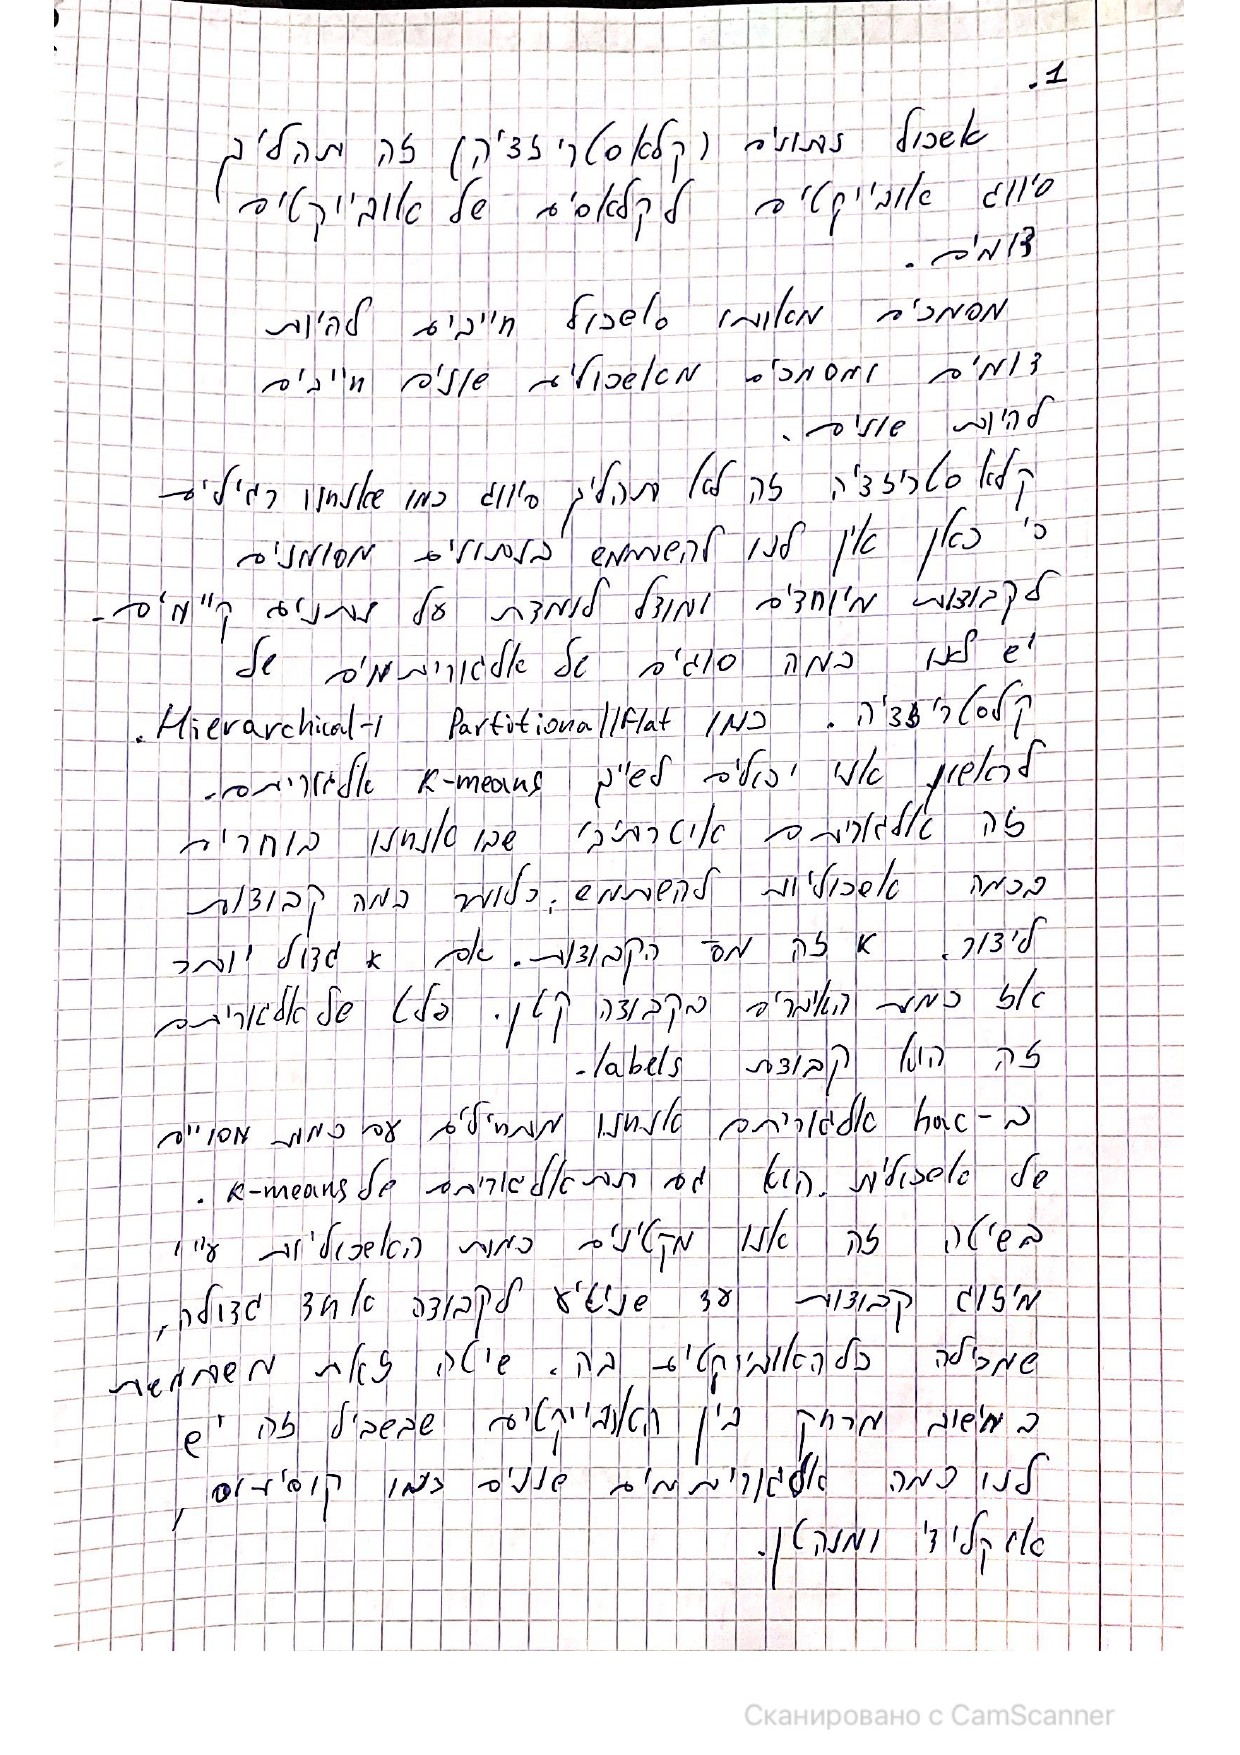

In [2]:
from IPython.display import Image
Image("C:\\NewFoulder\\SCE\\שנה ג\\מבוא לאיחזור מידע\\HW\\5\\1\\1_page-0001.jpg")

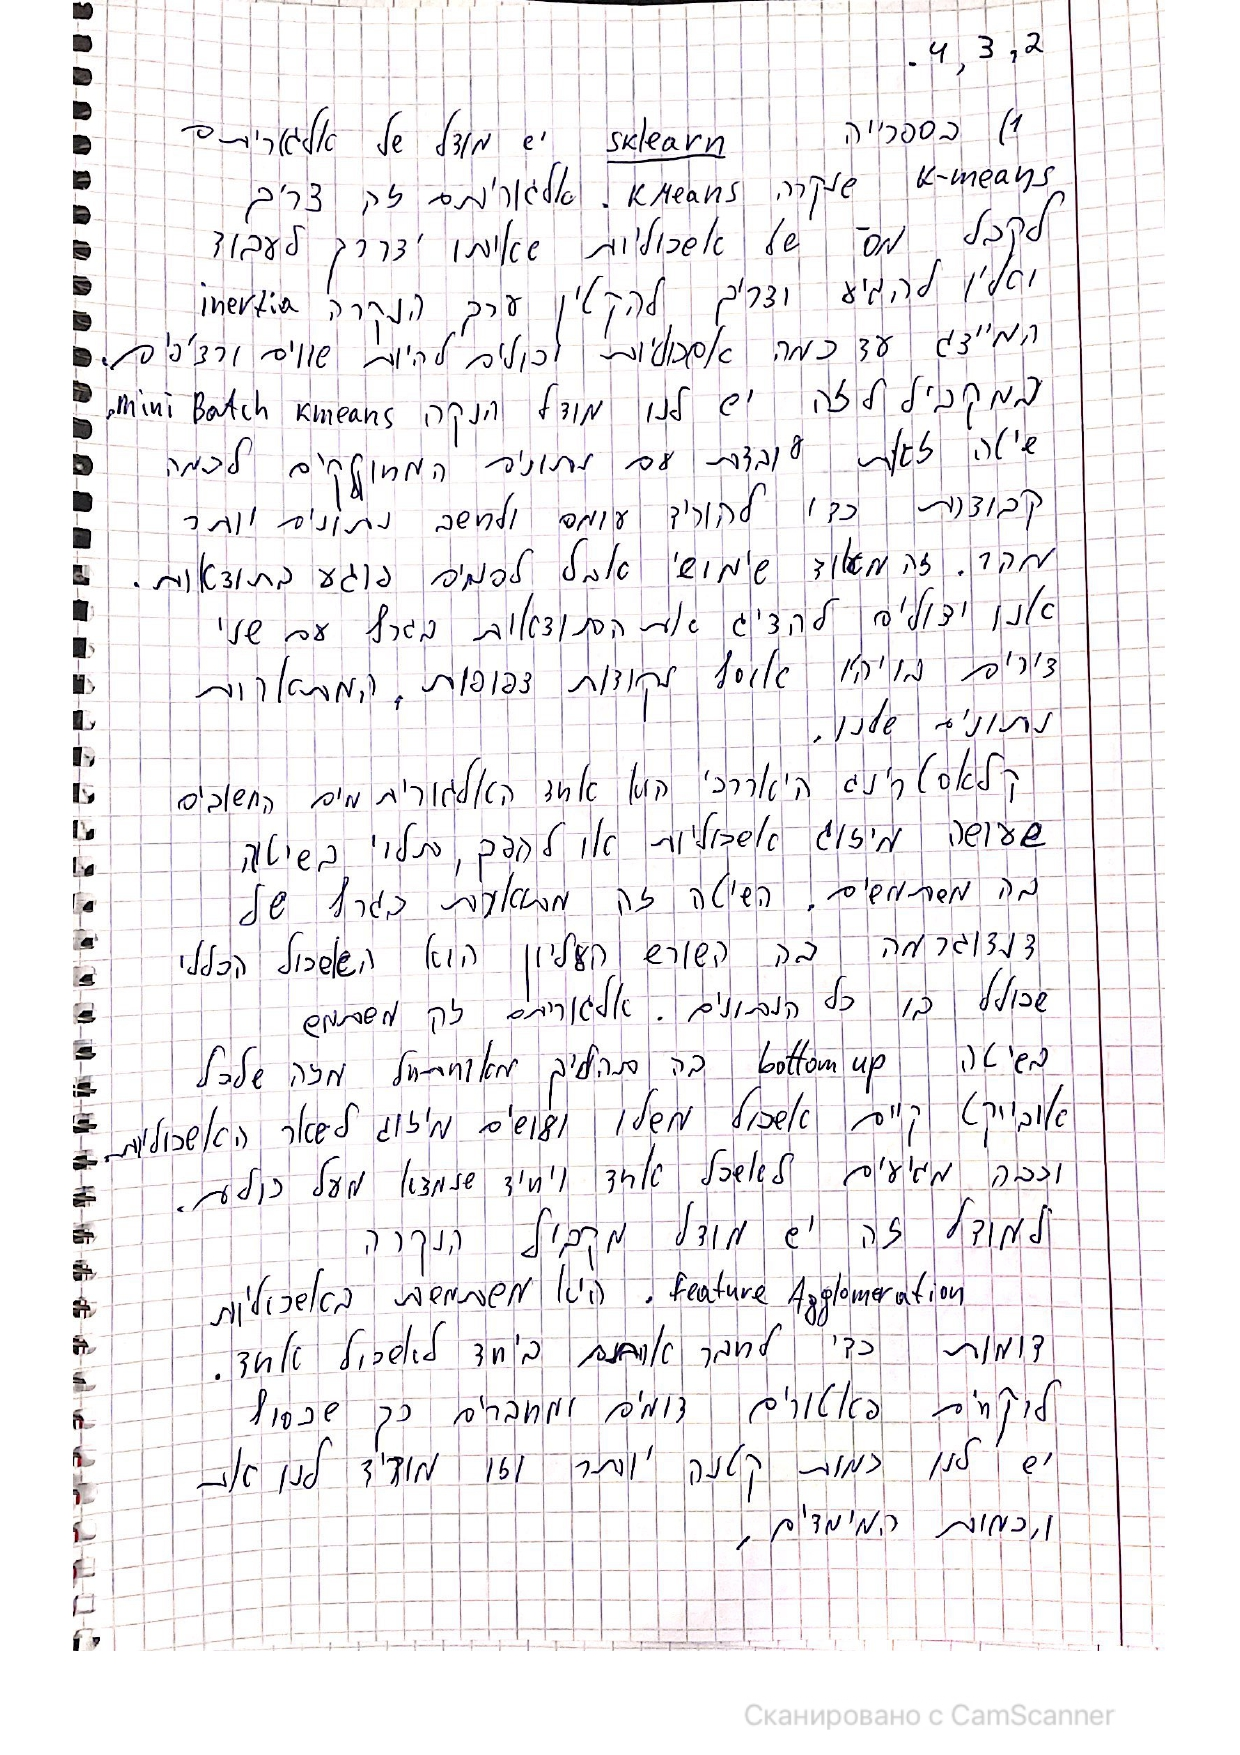

In [3]:
Image("C:\\NewFoulder\\SCE\\שנה ג\\מבוא לאיחזור מידע\\HW\\5\\2\\2_page-0001.jpg")

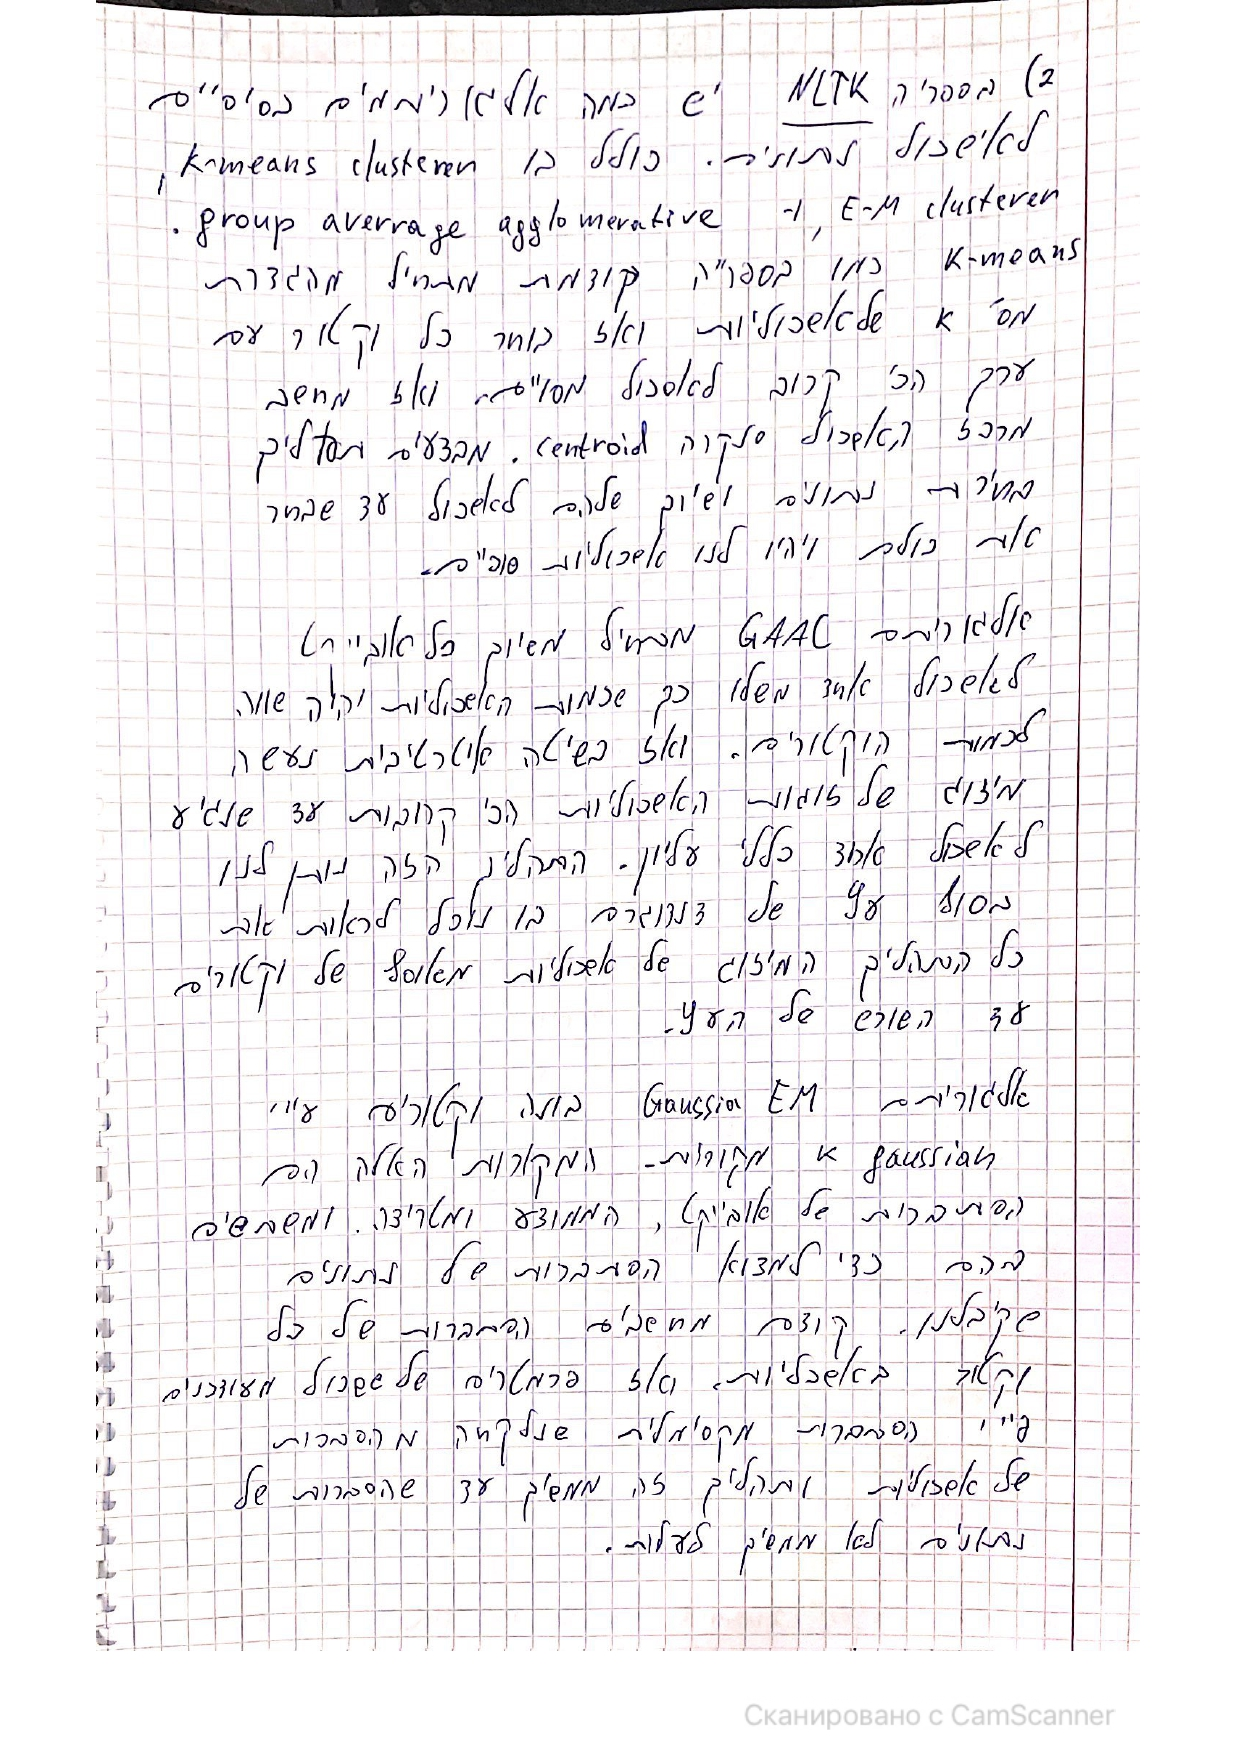

In [4]:
Image("C:\\NewFoulder\\SCE\\שנה ג\\מבוא לאיחזור מידע\\HW\\5\\3\\3_page-0001.jpg")

In [5]:
categories = ['talk.politics.misc', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

df = pd.DataFrame(data={'text': list(newsgroups_train.data) ,'label': list(newsgroups_train.target) })
df.shape

(3363, 2)

In [6]:
#data cleaning

#print(df)

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace('[^\w\s]','') 
df['text'] = df['text'].str.replace('[^a-z ]','') 
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df.shape

(3363, 2)

In [7]:
X = df['text']
y = df['label']

first_cos_time = datetime.now() 
#TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

first_cos_time_final = datetime.now() - first_cos_time
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_cos_time_final))
X_train_dtm.shape

Time elapsed in (hh:mm:ss.ms): "0:00:00.651648"


(2522, 50773)

### Sklearn Libraries

In [8]:
from sklearn.cluster import KMeans
import numpy as np
time1 = datetime.now() 
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train_dtm[:100])
kmeans.labels_

y_pred = kmeans.predict(X_test_dtm)
kmeans_score1 = accuracy_score(y_test, y_pred)
print(kmeans_score1)
time1 = datetime.now() - time1
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time1))
X_train_dtm.shape

0.2853745541022592
Time elapsed in (hh:mm:ss.ms): "0:00:00.377786"


(2522, 50773)

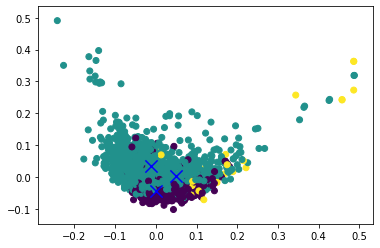

In [9]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=5, random_state=21)
reduced_features = pca.fit_transform(X_train_dtm.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(reduced_features[:,0], reduced_features[:,1],
c=kmeans.predict(X_train_dtm))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [10]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
time2 = datetime.now() 
# fit on the whole data
kmeans = MiniBatchKMeans(n_clusters=2, random_state=0,  batch_size=6, max_iter=10).fit(X_train_dtm[:100])
kmeans.cluster_centers_


y_pred = kmeans.predict(X_test_dtm)
kmeans_score2 = accuracy_score(y_test, y_pred)
print(kmeans_score2)
time2 = datetime.now() - time2
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time2))
X_train_dtm.shape

0.29369797859690844
Time elapsed in (hh:mm:ss.ms): "0:00:00.177897"


(2522, 50773)

In [11]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
time3 = datetime.now() 
clustering = AgglomerativeClustering().fit(X_train_dtm[:100].toarray())

kmeans_score3 = accuracy_score(y_test[:100], clustering.labels_)
print(kmeans_score3)
time3 = datetime.now() - time3
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time3))
X_train_dtm.shape

0.26
Time elapsed in (hh:mm:ss.ms): "0:00:00.460739"


(2522, 50773)

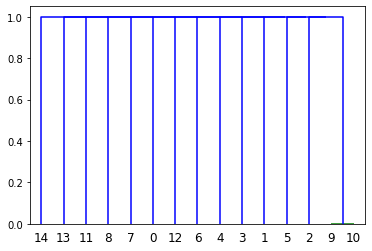

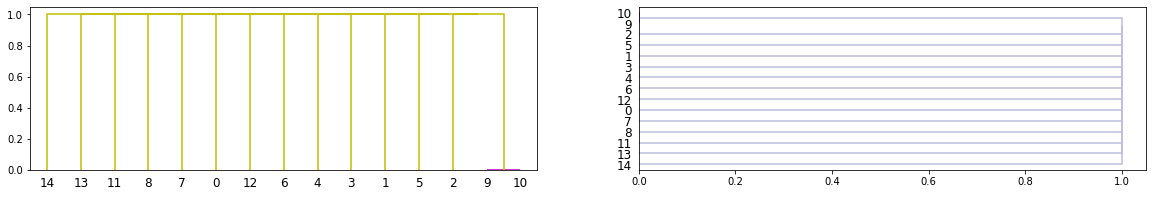

Time elapsed in (hh:mm:ss.ms): "0:00:00.727598"


In [12]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
time4 = datetime.now() 

ytdist = X_train_dtm[:15].toarray()
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)


hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 2, figsize=(20, 3))
dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y',
                           orientation='top')
dn2 = hierarchy.dendrogram(Z, ax=axes[1],
                           above_threshold_color='#bcbddc',
                           orientation='right')
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()
time4 = datetime.now() - time4
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time4))

### Problem  with execute FeatureAgglomeration

In [13]:

# import numpy as np
# from sklearn import datasets, cluster

# agglo = cluster.FeatureAgglomeration(n_clusters=3)
# agglo.fit(X_train_dtm.toarray())

# X_reduced = agglo.transform(X_train_dtm.toarray())
# X_reduced.shape

### Execution time

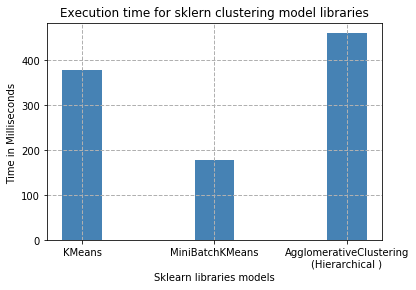

In [14]:
l = [time1.microseconds/1000,time2.microseconds/1000,time3.microseconds/1000]
x = np.arange(len(l))
plt.bar(x+1,l,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('Sklearn libraries models')
plt.ylabel('Time in Milliseconds ')
plt.xticks([1,2,3],['KMeans','MiniBatchKMeans','AgglomerativeClustering\n(Hierarchical )'])
plt.title('Execution time for sklern clustering model libraries')
plt.yticks()
plt.style.use('default')
plt.show()

### Accuracy score

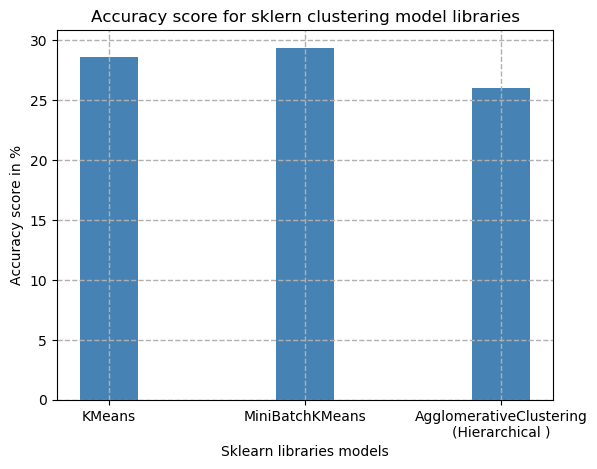

In [15]:
l = [kmeans_score1*100,kmeans_score2*100,kmeans_score3*100]
x = np.arange(len(l))
plt.bar(x+1,l,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('Sklearn libraries models')
plt.ylabel('Accuracy score in %')
plt.xticks([1,2,3],['KMeans','MiniBatchKMeans','AgglomerativeClustering\n(Hierarchical )'])
plt.title('Accuracy score for sklern clustering model libraries')
plt.yticks()
plt.style.use('default')
plt.show()

### As we can see accuracy score of three our algoritms isnt very diffent
### And k-means accurecy is little better
### But execution time of MiniBatchKMeans is extremely much less then others and more effective.

### NLTK Libraries

In [16]:
from nltk.cluster import GAAClusterer
 
time1 = datetime.now() 
# use a set of tokens with 2D indices
vectors = [X_train_dtm[:100]]
 
# test the GAAC clusterer with 4 clusters
clusterer = GAAClusterer(3)
clusters = clusterer.cluster(X_train_dtm[:841].toarray(), True)

# show the dendrogram
#clusterer.dendrogram().show()
 

nltk_score1 = accuracy_score(y_test[:841], clusters)
print(nltk_score1)
time1 = datetime.now() - time1
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time1))

C:\Users\User\Anaconda3\lib\site-packages\nltk\cluster\util.py:116: RuntimeWarning: invalid value encountered in true_divide
  return vector / sqrt(numpy.dot(vector, vector))


0.28180737217598095
Time elapsed in (hh:mm:ss.ms): "0:00:49.850729"


In [17]:
# example from figure 14.9, page 517, Manning and Schutze
 
from nltk.cluster import KMeansClusterer, euclidean_distance
time2 = datetime.now()  

clusterer = KMeansClusterer(3, euclidean_distance) #, repeats=3
clusters = clusterer.cluster(X_train_dtm[:841].toarray(), True, trace=True)

nltk_score2 = accuracy_score(y_test, clusters)
print(kmeans_score1)
time2 = datetime.now() - time2
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time2))

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
0.2853745541022592
Time elapsed in (hh:mm:ss.ms): "0:00:02.943047"


### Problem  with execute EMClusterer

In [18]:
# from nltk import cluster
 
# # example from figure 14.10, page 519, Manning and Schutze

# clusterer = cluster.EMClusterer([[4, 2], [4, 2.01]], bias=0.1)
# clusters = clusterer.cluster([np.array(f) for f in [[0.5, 0.5], [1.5, 0.5], [1, 3]]], True, trace=True)
 
# print ('Clustered:', vectors)
# print ('As:       ', clusters)

### Execution time

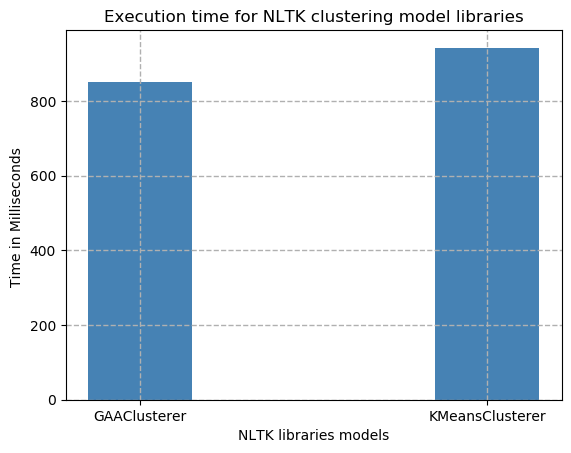

In [19]:
l = [time1.microseconds/1000,time2.microseconds/1000]
x = np.arange(len(l))
plt.bar(x+1,l,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('NLTK libraries models')
plt.ylabel('Time in Milliseconds ')
plt.xticks([1,2],['GAAClusterer','KMeansClusterer'])
plt.title('Execution time for NLTK clustering model libraries')
plt.yticks()
plt.style.use('default')
plt.show()

### Accuracy score

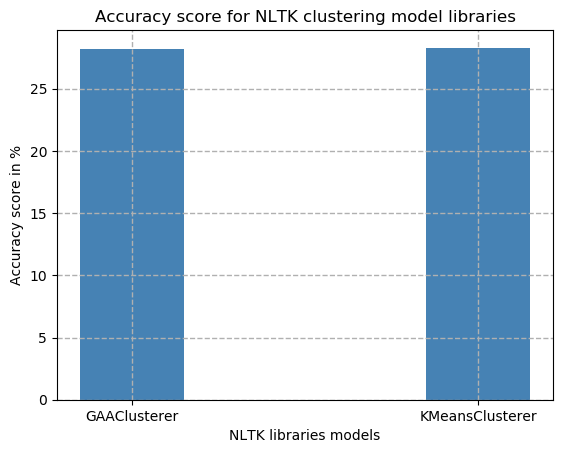

In [20]:
l = [nltk_score1*100,nltk_score2*100,]
x = np.arange(len(l))
plt.bar(x+1,l,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('NLTK libraries models')
plt.ylabel('Accuracy score in %')
plt.xticks([1,2],['GAAClusterer','KMeansClusterer'])
plt.title('Accuracy score for NLTK clustering model libraries')
plt.yticks()
plt.style.use('default')
plt.show()

### As we can see accuracy score of k means algorithm and hierarchical isn't very different
### And hierarchical is more accurate
### But we can see extreme difference of exexution time that is more efficient in k-means algorithm.

In [21]:
first_time_final = datetime.now() - first_time
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_time_final))

Time elapsed in (hh:mm:ss.ms): "0:01:08.768270"


### Summary

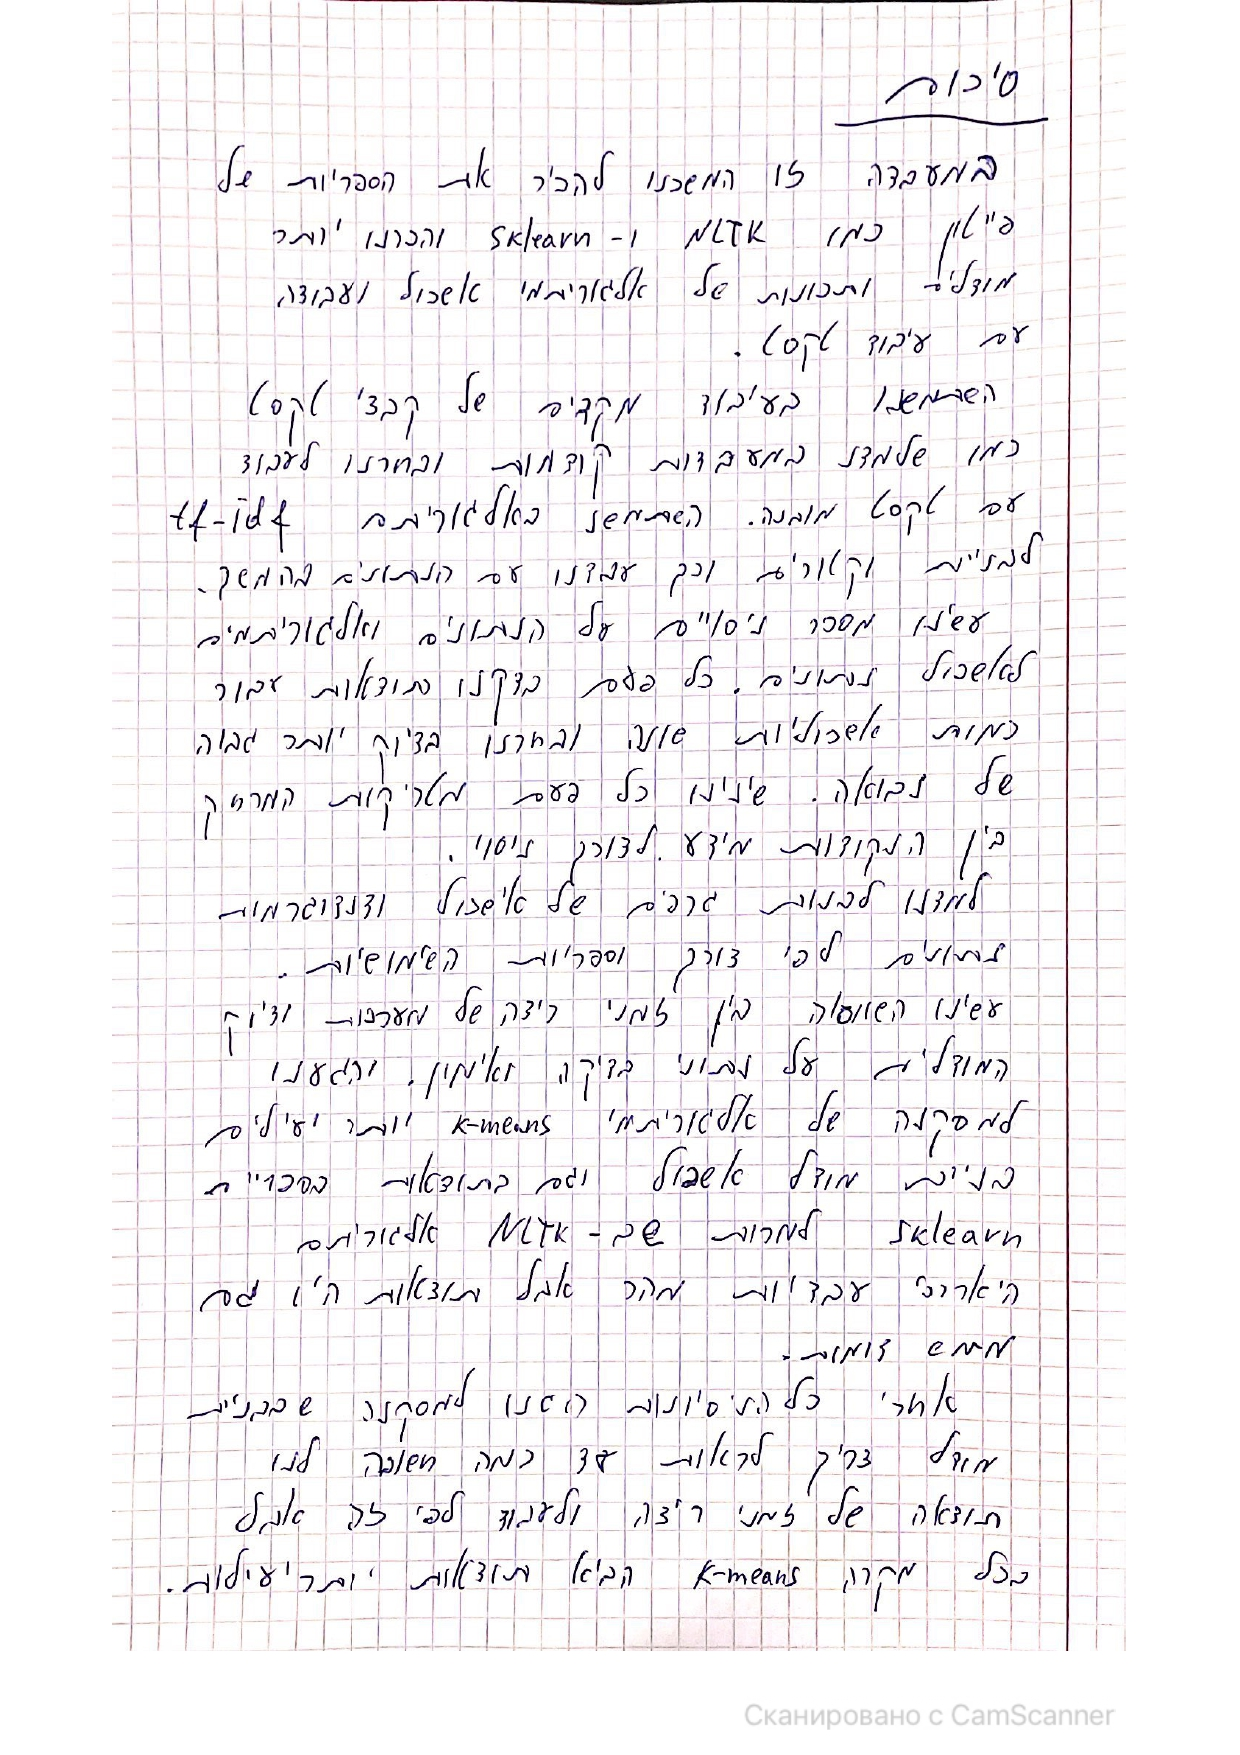

In [22]:
Image("C:\\NewFoulder\\SCE\\שנה ג\\מבוא לאיחזור מידע\\HW\\5\\4\\4_page-0001.jpg")